<a href="https://colab.research.google.com/github/chandrajitpal/DUT_textclassification/blob/main/DTU_binarisation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**SDG CLASSIFIER**

In [12]:
# Step 1: Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import SGDClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, accuracy_score


from google.colab import drive
drive.mount('/content/drive')




# Step 2: Load and Prepare the Data
try:
    # Load the dataset from the CSV file
    file_path = '/content/drive/My Drive/DTU_data/Train_Binary_22July2025.xlsx'
    #file_path = 'Train_Binary_22July2025.xlsx - Binary classification.csv'
    df = pd.read_excel(file_path)

    print("Dataset loaded successfully. Here are the first 5 rows:")
    print(df.head())
    print("\nDataset Information:")
    df.info()

    # --- Data Cleaning and Preprocessing ---
    # We only need the 'Abstract' and 'Yes/No' columns.
    # Let's drop rows where either of these is missing.
    df_clean = df[['Abstract', 'Yes/No']].dropna()

    # Convert the target labels 'Yes'/'No' to numerical format (1/0)
    # This is required for most machine learning models.
    df_clean['label'] = df_clean['Yes/No'].map({'Yes': 1, 'No': 0})

    # Define our features (X) and target (y)
    X = df_clean['Abstract']
    y = df_clean['label']

    print(f"\nNumber of samples after cleaning: {len(df_clean)}")
    print(f"Class distribution:\n{df_clean['Yes/No'].value_counts()}")

    # Step 3: Split the data into training and testing sets
    # 80% for training, 20% for testing.
    # random_state ensures we get the same split every time we run the script, for reproducibility.
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42, stratify=y
    )

    print(f"\nTraining set size: {len(X_train)}")
    print(f"Testing set size: {len(X_test)}")

    # Step 4: Build the AI Model Pipeline
    # A pipeline chains together multiple steps. Here, it will:
    # 1. Convert text to TF-IDF vectors.
    # 2. Train an SGD Classifier on these vectors.
    model_pipeline = Pipeline([
        ('tfidf', TfidfVectorizer(stop_words='english', ngram_range=(1, 2))),
        ('clf', SGDClassifier(loss='hinge', penalty='l2', alpha=1e-3, random_state=42, max_iter=50, tol=None)),
    ])

    # Step 5: Train the AI Model
    print("\nTraining the model...")
    model_pipeline.fit(X_train, y_train)
    print("Training complete!")

    # Step 6: Evaluate the Model
    print("\nEvaluating model performance on the test set...")
    y_pred = model_pipeline.predict(X_test)

    # Calculate and print the accuracy
    accuracy = accuracy_score(y_test, y_pred)
    print(f"\nModel Accuracy: {accuracy:.2%}")

    # Print a detailed classification report (precision, recall, f1-score)
    print("\nClassification Report:")
    # Use target_names to show 'Yes' and 'No' instead of 1 and 0
    print(classification_report(y_test, y_pred, target_names=['No', 'Yes']))

    # Step 7: Create a Prediction Function
    def predict_abstract(abstract_text):
        """
        Takes a new abstract text as input and predicts if it's 'Yes' or 'No'.
        """
        # The model pipeline handles both vectorization and prediction
        prediction = model_pipeline.predict([abstract_text])

        # Convert the numerical prediction back to a human-readable label
        return 'Yes' if prediction[0] == 1 else 'No'

    # --- Example Usage of the Predictor ---
    print("\n--- Testing the Predictor with New Examples ---")

    # Example 1 (likely 'Yes' based on keywords like 'well-being' and 'climate change')
    abstract1 = "This study examines the direct impact of climate change on the socio-economic well-being of coastal communities. We analyze how rising sea levels affect health and livelihood."
    print(f"\nAbstract: '{abstract1}'")
    print(f"Prediction: {predict_abstract(abstract1)}")

    # Example 2 (likely 'No' as it's not directly about climate change and well-being)
    #abstract2 = "We present a new algorithm for data compression using neural networks. The focus is on computational efficiency and lossless compression ratios for large datasets."
    abstract2 = "This paper details the synthesis of a new polymer chain. The molecular structure was analyzed using nuclear magnetic resonance spectroscopy. No applications are discussed."
    #abstract2 = "We developed a novel cryptographic algorithm for secure data transmission. The method uses quantum principles to ensure encryption is unbreakable by conventional means. This has applications in banking and military communications."

    print(f"\nAbstract: '{abstract2}'")
    print(f"Prediction: {predict_abstract(abstract2)}")


except FileNotFoundError:
    print(f"Error: The file 'Train_Binary_22July2025.xlsx - Binary classification.csv' was not found.")
    print("Please make sure the CSV file is in the same directory as this script.")
except Exception as e:
    print(f"An error occurred: {e}")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Dataset loaded successfully. Here are the first 5 rows:
                                   Author full names  \
0  ?en, Emine (59152436700); ?at, Beyza (24337850...   
1  ?erani?, Goran (56349161600); Krivokapi?, Nata...   
2  ?imon, Simona (55858278900); Stoian, Claudia E...   
3  Abanyie, Samuel Kojo (57218170264); Apea, Ohen...   
4  Abate, Esubalew (57217860334); Semie, Negussie...   

                                               Title    Year  \
0  Bioswales as Engineering Functions of Nature-B...  2024.0   
1  Perception of Climate Change and Assessment of...  2023.0   
2  The Concept of Sustainability in the Romanian ...  2020.0   
3  Sources and factors influencing groundwater qu...  2023.0   
4  Climate Change Adaptation Activities for Agric...  2017.0   

                   Source title                           DOI  \
0                     Forest

**Upgraded with WordNetLemmatizer**

In [7]:
!pip install nltk
import nltk
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('punkt_tab')



[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
--- 1. Data Loading and Cleaning ---
Applying advanced text preprocessing (lemmatization)...
Dataset shape after cleaning: (99, 3)
Class distribution:
Yes/No
Yes    55
No     44
Name: count, dtype: int64

--- 2. Data Splitting ---
Training set size: 74
Testing set size: 25

--- 3. Finding the Best Model Parameters (Hyperparameter Tuning) ---
Fitting 5 folds for each of 24 candidates, totalling 120 fits

Best parameters found:
{'clf__alpha': 0.0001, 'clf__loss': 'hinge', 'tfidf__max_df': 1.0, 'tfidf__ngram_range': (1, 1)}


--- 4. Final Model Evaluation ---
Model Accuracy: 64.00%

Classification Report:
              precision    recall  f1-score   support

          No       0.57      0.73      0.64        11
         Yes       0.73      0.57      0.64        14

    accuracy                           0.64        25
   macro avg       0.65      0.65      0.64

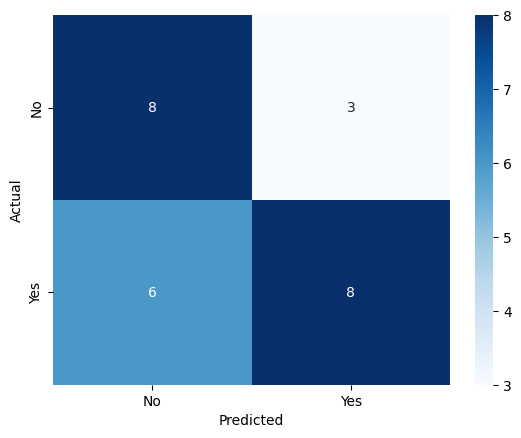


--- 5. Testing the Predictor with New Examples ---

Abstract: 'This research explores the negative mental health outcomes, including anxiety and depression, directly linked to climate change-induced displacement and food insecurity. The well-being of vulnerable populations is severely impacted.'
Prediction: Yes (Confidence not available for this model)

Abstract: 'Forest management practices are critical for carbon sequestration. This study analyzes the economic benefits of sustainable forestry but does not directly measure the health or well-being impacts on local communities.'
Prediction: No (Confidence not available for this model)


In [11]:





# Step 1: Import necessary libraries
import pandas as pd
import re
import nltk
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import SGDClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Step 2: Load and Prepare the Data
try:
    # --- Mount Google Drive ---
    from google.colab import drive
    drive.mount('/content/drive')

    # --- Load Data ---
    file_path = '/content/drive/My Drive/DTU_data/Train_Binary_22July2025.xlsx'
    df = pd.read_excel(file_path)

    print("--- 1. Data Loading and Cleaning ---")

    # --- Data Cleaning ---
    df_clean = df[['Abstract', 'Yes/No']].dropna().copy()
    df_clean['label'] = df_clean['Yes/No'].map({'Yes': 1, 'No': 0})

    # --- Advanced Text Preprocessing Function ---
    lemmatizer = WordNetLemmatizer()

    def preprocess_text(text):
        # Remove special characters and digits
        text = re.sub(r'[^a-zA-Z\s]', '', text, re.I|re.A)
        # Convert to lowercase
        text = text.lower()
        # Lemmatize each word
        tokens = word_tokenize(text)
        lemmatized_tokens = [lemmatizer.lemmatize(word) for word in tokens]
        return " ".join(lemmatized_tokens)

    # Apply the preprocessing to the 'Abstract' column
    print("Applying advanced text preprocessing (lemmatization)...")
    X = df_clean['Abstract'].apply(preprocess_text)
    y = df_clean['label']

    print(f"Dataset shape after cleaning: {df_clean.shape}")
    print(f"Class distribution:\n{df_clean['Yes/No'].value_counts()}\n")

    # Step 3: Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.25, random_state=42, stratify=y
    )

    print("--- 2. Data Splitting ---")
    print(f"Training set size: {len(X_train)}")
    print(f"Testing set size: {len(X_test)}\n")

    # Step 4: Build the AI Model Pipeline
    # The pipeline remains the same, but we will define a parameter grid for tuning.
    pipeline = Pipeline([
        ('tfidf', TfidfVectorizer(stop_words='english')),
        ('clf', SGDClassifier(random_state=42, class_weight='balanced', max_iter=1000, tol=1e-3)),
    ])

    # Step 5: Hyperparameter Tuning with GridSearchCV
    print("--- 3. Finding the Best Model Parameters (Hyperparameter Tuning) ---")

    # Define the parameters to search through
    parameters = {
        'tfidf__ngram_range': [(1, 1), (1, 2)],  # Test single words and word pairs
        'tfidf__max_df': [0.75, 1.0],           # Ignore words that are too frequent
        'clf__alpha': [1e-5, 1e-4, 1e-3],       # Regularization strength
        'clf__loss': ['hinge', 'log_loss'],     # Different loss functions
    }

    # Create the Grid Search object. cv=5 means 5-fold cross-validation.
    # n_jobs=-1 uses all available CPU cores to speed up the search.
    grid_search = GridSearchCV(pipeline, parameters, cv=5, n_jobs=-1, verbose=1)

    # Run the search on the training data
    grid_search.fit(X_train, y_train)

    print("\nBest parameters found:")
    print(grid_search.best_params_)
    print("\n")

    # The best model is automatically saved in grid_search.best_estimator_
    best_model = grid_search.best_estimator_

    # Step 6: Evaluate the Best Model
    print("--- 4. Final Model Evaluation ---")
    y_pred = best_model.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    print(f"Model Accuracy: {accuracy:.2%}")

    print("\nClassification Report:")
    print(classification_report(y_test, y_pred, target_names=['No', 'Yes']))

    print("Confusion Matrix:")
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()

    # Step 7: Create a Prediction Function using the tuned model
    def predict_abstract(abstract_text):
        """
        Takes a new abstract text as input and predicts if it's 'Yes' or 'No'.
        """
        # The best_model pipeline handles preprocessing, vectorization, and prediction
        prediction = best_model.predict([abstract_text])

        label = 'Yes' if prediction[0] == 1 else 'No'

        # Check if the model supports predict_proba
        if hasattr(best_model, 'predict_proba'):
            probability = best_model.predict_proba([abstract_text])
            confidence = probability[0][prediction[0]]
            return f"Prediction: {label} (Confidence: {confidence:.2%})"
        else:
            return f"Prediction: {label} (Confidence not available for this model)"


    # --- Example Usage of the Predictor ---
    print("\n--- 5. Testing the Predictor with New Examples ---")

    abstract1 = "This research explores the negative mental health outcomes, including anxiety and depression, directly linked to climate change-induced displacement and food insecurity. The well-being of vulnerable populations is severely impacted."
    print(f"\nAbstract: '{abstract1}'")
    print(predict_abstract(abstract1))

    #abstract2 = "We developed a novel cryptographic algorithm for secure data transmission. The method uses quantum principles to ensure encryption is unbreakable by conventional means. This has applications in banking and military communications."
    #abstract2 = "To ensure the well-being of urban residents, we must adapt to climate change. This review explores the impact of green infrastructure on the quality of life and health in cities."
    #abstract2 = "This study examines the direct impact of climate change on the socio-economic well-being of coastal communities. We analyze how rising sea levels affect health and livelihood."
    abstract2 = "Forest management practices are critical for carbon sequestration. This study analyzes the economic benefits of sustainable forestry but does not directly measure the health or well-being impacts on local communities."


    print(f"\nAbstract: '{abstract2}'")

    print(predict_abstract(abstract2))

except FileNotFoundError:
    print(f"Error: The file '{file_path}' was not found.")
    print("Please check the file path and name. If in Google Colab, make sure you have mounted your drive and copied the correct path.")
except Exception as e:
    print(f"An unexpected error occurred: {e}")

**LOGISTIC REGRESSION**

In [ ]:
# Step 1: Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression  # Changed from SGDClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, accuracy_score


from google.colab import drive
drive.mount('/content/drive')

#file_path = pd.read_csv('/content/drive/My Drive/DTU_data/Train_Binary_22July2025.xlsx - Binary classification.csv')


# Step 2: Load and Prepare the Data
try:
    # --- Load Data ---
    # Ensure this path is correct for your Google Colab environment
    file_path = '/content/drive/My Drive/DTU_data/Train_Binary_22July2025.xlsx'
    df = pd.read_excel(file_path)

    print("--- 1. Data Loading and Cleaning ---")
    print(f"Original dataset shape: {df.shape}")

    # --- Data Cleaning and Preprocessing ---
    # Focus on the 'Abstract' and 'Yes/No' columns and remove rows with missing values
    df_clean = df[['Abstract', 'Yes/No']].dropna().copy() # Use .copy() to avoid SettingWithCopyWarning

    # Map the target labels 'Yes'/'No' to numerical format (1/0)
    df_clean['label'] = df_clean['Yes/No'].map({'Yes': 1, 'No': 0})

    # Define features (X) and target (y)
    X = df_clean['Abstract']
    y = df_clean['label']

    print(f"Dataset shape after cleaning: {df_clean.shape}")
    print(f"Class distribution:\n{df_clean['Yes/No'].value_counts()}\n")

    # Step 3: Split the data into training and testing sets
    # Using 'stratify=y' is important here to ensure both the training and test sets
    # have a similar proportion of 'Yes' and 'No' labels, which is crucial for imbalanced datasets.
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.25, random_state=42, stratify=y
    )

    print("--- 2. Data Splitting ---")
    print(f"Training set size: {len(X_train)}")
    print(f"Testing set size: {len(X_test)}\n")


    # Step 4: Build the Improved AI Model Pipeline
    print("--- 3. Building the Model Pipeline ---")
    model_pipeline = Pipeline([
        ('tfidf', TfidfVectorizer(
            stop_words='english',
            ngram_range=(1, 2), # Consider both single words and two-word phrases
            min_df=3,           # Ignore terms that appear in less than 3 documents
            max_df=0.9          # Ignore terms that appear in more than 90% of documents (too common)
        )),
        ('clf', LogisticRegression(
            solver='liblinear', # Good solver for this type of problem
            class_weight='balanced', # Crucial for handling imbalanced data
            random_state=42
        )),
    ])
    print("Pipeline created with TfidfVectorizer and LogisticRegression.\n")

    # Step 5: Train the AI Model
    print("--- 4. Training the Model ---")
    model_pipeline.fit(X_train, y_train)
    print("Training complete!\n")

    # Step 6: Evaluate the Model
    print("--- 5. Model Evaluation ---")
    y_pred = model_pipeline.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    print(f"Model Accuracy: {accuracy:.2%}")

    # The classification report is key. For 'Yes' (class 1), we want high 'recall'
    # (finding all the 'Yes' cases) and 'precision' (not mislabeling 'No' cases).
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred, target_names=['No', 'Yes']))


    # Step 7: Create a Prediction Function for new abstracts
    def predict_abstract(abstract_text):
        """
        Takes a new abstract text as input and predicts if it's 'Yes' or 'No'.
        """
        prediction = model_pipeline.predict([abstract_text])
        probability = model_pipeline.predict_proba([abstract_text])

        label = 'Yes' if prediction[0] == 1 else 'No'
        confidence = probability[0][prediction[0]]

        return f"Prediction: {label} (Confidence: {confidence:.2%})"

    # --- Example Usage of the Predictor ---
    print("\n--- 6. Testing the Predictor with New Examples ---")

    # Example 1: Should be 'Yes'
    abstract1 = "To ensure the well-being of urban residents, we must adapt to climate change. This review explores the impact of green infrastructure on the quality of life and health in cities."
    print(f"\nAbstract: '{abstract1}'")
    print(predict_abstract(abstract1))

    # Example 2: Should be 'No'
    abstract2 = "This paper details the synthesis of a new polymer chain. The molecular structure was analyzed using nuclear magnetic resonance spectroscopy. No applications are discussed."
    print(f"\nAbstract: '{abstract2}'")
    print(predict_abstract(abstract2))

    # Example 3: A tricky one, more about general sustainability
    abstract3 = "This study examines the direct impact of climate change on the socio-economic well-being of coastal communities. We analyze how rising sea levels affect health and livelihood."
    print(f"\nAbstract: '{abstract3}'")
    print(predict_abstract(abstract3))


except FileNotFoundError:
    print(f"Error: The file '{file_path}' was not found.")
    print("Please check the file path and name. If in Google Colab, make sure you have mounted your drive and copied the correct path.")
except Exception as e:
    print(f"An unexpected error occurred: {e}")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
--- 1. Data Loading and Cleaning ---
Original dataset shape: (8467, 10)
Dataset shape after cleaning: (99, 3)
Class distribution:
Yes/No
Yes    55
No     44
Name: count, dtype: int64

--- 2. Data Splitting ---
Training set size: 74
Testing set size: 25

--- 3. Building the Model Pipeline ---
Pipeline created with TfidfVectorizer and LogisticRegression.

--- 4. Training the Model ---
Training complete!

--- 5. Model Evaluation ---
Model Accuracy: 64.00%

Classification Report:
              precision    recall  f1-score   support

          No       0.58      0.64      0.61        11
         Yes       0.69      0.64      0.67        14

    accuracy                           0.64        25
   macro avg       0.64      0.64      0.64        25
weighted avg       0.64      0.64      0.64        25


--- 6. Testing the Predictor with New Examples ---

Abstract: 

**Random Forest**

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
--- 1. Data Loading and Cleaning ---
Original dataset shape: (8467, 10)
Dataset shape after cleaning: (99, 3)
Class distribution:
Yes/No
Yes    55
No     44
Name: count, dtype: int64

--- 2. Data Splitting ---
Training set size: 74
Testing set size: 25

--- 3. Building the Model Pipeline ---
Pipeline created with TfidfVectorizer and RandomForestClassifier.

--- 4. Training the Model ---
Training complete!

--- 5. Model Evaluation ---
Model Accuracy: 52.00%

Classification Report:
              precision    recall  f1-score   support

          No       0.43      0.27      0.33        11
         Yes       0.56      0.71      0.62        14

    accuracy                           0.52        25
   macro avg       0.49      0.49      0.48        25
weighted avg       0.50      0.52      0.50        25

Confusion Matrix:


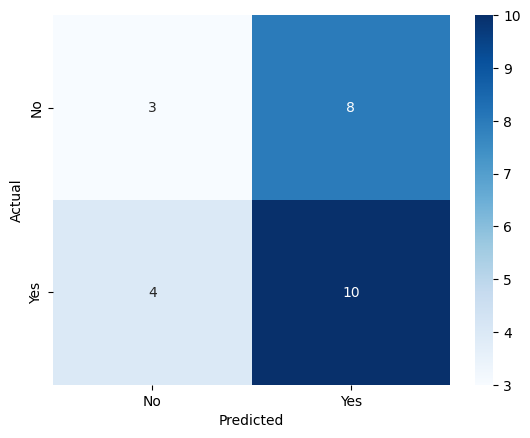


--- 6. Testing the Predictor with New Examples ---

Abstract: 'This research explores the negative mental health outcomes, including anxiety and depression, directly linked to climate change-induced displacement and food insecurity. The well-being of vulnerable populations is severely impacted.'
Prediction: Yes (Confidence: 61.00%)

Abstract: 'We developed a novel cryptographic algorithm for secure data transmission. The method uses quantum principles to ensure encryption is unbreakable by conventional means. This has applications in banking and military communications.'
Prediction: Yes (Confidence: 56.00%)

Abstract: 'Forest management practices are critical for carbon sequestration. This study analyzes the economic benefits of sustainable forestry but does not directly measure the health or well-being impacts on local communities.'
Prediction: Yes (Confidence: 57.00%)


In [ ]:
# Step 1: Import necessary libraries
import pandas as pd
import re
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier  # <-- Changed Model
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Step 2: Load and Prepare the Data
try:
    # --- Mount Google Drive ---
    from google.colab import drive
    drive.mount('/content/drive')

    # --- Load Data ---
    # Make sure this path is correct for your Google Colab environment
    #file_path = '/content/drive/My Drive/DTU_data/Train_Binary_22July2025.xlsx - Binary classification.csv'
    file_path = '/content/drive/My Drive/DTU_data/Train_Binary_22July2025.xlsx'
    # Using read_csv as the file is a CSV, despite the complex name.
    # If this fails, try pd.read_excel(file_path)
    df = pd.read_excel(file_path)

    print("--- 1. Data Loading and Cleaning ---")
    print(f"Original dataset shape: {df.shape}")

    # --- Data Cleaning and Preprocessing ---
    # Focus on the 'Abstract' and 'Yes/No' columns and remove rows with missing values
    df_clean = df[['Abstract', 'Yes/No']].dropna().copy()

    # Map the target labels 'Yes'/'No' to numerical format (1/0)
    df_clean['label'] = df_clean['Yes/No'].map({'Yes': 1, 'No': 0})

    # Define features (X) and target (y)
    X = df_clean['Abstract']
    y = df_clean['label']

    print(f"Dataset shape after cleaning: {df_clean.shape}")
    print(f"Class distribution:\n{df_clean['Yes/No'].value_counts()}\n")

    # Step 3: Split the data into training and testing sets
    # Stratify ensures the class distribution is the same in train and test sets
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.25, random_state=42, stratify=y
    )

    print("--- 2. Data Splitting ---")
    print(f"Training set size: {len(X_train)}")
    print(f"Testing set size: {len(X_test)}\n")


    # Step 4: Build the Improved AI Model Pipeline with RandomForest
    print("--- 3. Building the Model Pipeline ---")
    model_pipeline = Pipeline([
        ('tfidf', TfidfVectorizer(
            stop_words='english',
            ngram_range=(1, 2),
            min_df=3,
            max_df=0.9
        )),
        ('clf', RandomForestClassifier(
            n_estimators=100,         # Number of trees in the forest
            class_weight='balanced_subsample', # Better handles imbalance
            random_state=42,
            n_jobs=-1                 # Use all available CPU cores
        )),
    ])
    print("Pipeline created with TfidfVectorizer and RandomForestClassifier.\n")

    # Step 5: Train the AI Model
    print("--- 4. Training the Model ---")
    model_pipeline.fit(X_train, y_train)
    print("Training complete!\n")

    # Step 6: Evaluate the Model
    print("--- 5. Model Evaluation ---")
    y_pred = model_pipeline.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    print(f"Model Accuracy: {accuracy:.2%}")

    print("\nClassification Report:")
    print(classification_report(y_test, y_pred, target_names=['No', 'Yes']))

    # --- Visual Confusion Matrix ---
    print("Confusion Matrix:")
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()


    # Step 7: Create a Prediction Function for new abstracts
    def predict_abstract(abstract_text):
        """
        Takes a new abstract text as input and predicts if it's 'Yes' or 'No'.
        """
        prediction = model_pipeline.predict([abstract_text])
        probability = model_pipeline.predict_proba([abstract_text])

        label = 'Yes' if prediction[0] == 1 else 'No'
        # Get the confidence score for the predicted class
        confidence = probability[0][prediction[0]]

        return f"Prediction: {label} (Confidence: {confidence:.2%})"

    # --- Example Usage of the Predictor ---
    print("\n--- 6. Testing the Predictor with New Examples ---")

    # Example 1: Clear "Yes" case
    abstract1 = "This research explores the negative mental health outcomes, including anxiety and depression, directly linked to climate change-induced displacement and food insecurity. The well-being of vulnerable populations is severely impacted."
    print(f"\nAbstract: '{abstract1}'")
    print(predict_abstract(abstract1))

    # Example 2: Clear "No" case
    abstract2 = "We developed a novel cryptographic algorithm for secure data transmission. The method uses quantum principles to ensure encryption is unbreakable by conventional means. This has applications in banking and military communications."
    print(f"\nAbstract: '{abstract2}'")
    print(predict_abstract(abstract2))

    # Example 3: More nuanced case
    abstract3 = "Forest management practices are critical for carbon sequestration. This study analyzes the economic benefits of sustainable forestry but does not directly measure the health or well-being impacts on local communities."
    print(f"\nAbstract: '{abstract3}'")
    print(predict_abstract(abstract3))


except FileNotFoundError:
    print(f"Error: The file '{file_path}' was not found.")
    print("Please check the file path and name. If in Google Colab, make sure you have mounted your drive and copied the correct path.")
except Exception as e:
    print(f"An unexpected error occurred: {e}")